# 코로나로 큰 타격을 받은 영화관, 코로나로 부상한 OTT 서비스
### - OTT서비스는 지속적인 고객들의 유치를 위하여 어떻게 해야할까?
#### - OTT서비스의 이용률 변화와 OTT서비스 가입에 영향을 끼치는 요인

2020년 2월 대한민국의 첫 코로나 확진자 발생으로 인하여 영화계는 큰 타격을 입었다고 한다. 
반대로 영화관을 가지 못하는 사람들은 집에서 사용하는 OTT서비스를 이용하여 영화를 관람하기 시작하였고
OTT 서비스는 자체적인 프로그램을 내놓으면서 OTT서비스의 이용자는 점점 더 증가하였다.

현재 2022년, 영화계는 다시 활기를 되찾아가고 있다.
하지만 OTT서비스의 이용자는 크게 줄지 않고 있는데 그 이유는 무엇일까? 

앞으로 OTT서비스를 사람들이 지속적으로 이용할 수 있도록 사람들이 서비스를 이용할 때 중요하게 생각하는 특성이 무엇인지 알아보도록 하자. 



### 자주 쓰는 모듈 import

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname = "C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family= font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

import warnings
warnings.filterwarnings(action='ignore')

# 1. 코로나가 OTT서비스와 영화관이용에 끼친 영향

## 1)  코로나 확진자 수 확인

- https://kdx.kr/data/view/3415

### (1) 일별 코로나 확진자 수

In [17]:
covid = pd.read_csv("data/Covid19InfState.csv")
covid_decide = covid[["stateDt","decideCnt"]]
covid_decide["stateDt"]= covid_decide["stateDt"].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

date=[]
for i in range(len(covid_decide)):
    x = covid_decide["stateDt"][i].year
    y = covid_decide["stateDt"][i].month
    date.append(str(x)+"-"+str(y))
    
covid_decide["date"] = date

covid_decide_date = covid_decide.sort_values(by="stateDt")
covid_decide_date = covid_decide_date.iloc[1:]
covid_decide_date = covid_decide_date.fillna(15.0)
covid_decide_date = covid_decide_date.drop_duplicates("stateDt")
covid_decide_date = covid_decide_date.reset_index(drop=True)

covid = [2]
for i in range(len(covid_decide_date)-1):
    x = covid_decide_date["decideCnt"].iloc[i+1]-covid_decide_date["decideCnt"].iloc[i]
    covid.append(x)
    
covid_decide_date["covid"] = covid

day_covid = covid_decide_date[["stateDt","covid"]]

day_covid.to_csv("data/일별확진자수.csv", index=False)
day_covid.head()

,stateDt,decideCnt,date
1,2020-02-02,2.0,2020-2
2,2020-02-03,15.0,2020-2
3,2020-02-04,15.0,2020-2
4,2020-02-05,19.0,2020-2
6,2020-02-06,23.0,2020-2
...,...,...,...
712,2021-12-27,611670.0,2021-12
713,2021-12-28,615532.0,2021-12
714,2021-12-29,620938.0,2021-12
715,2021-12-30,625967.0,2021-12


### (2) 월별 코로나 확진자 수 

In [50]:
# 위의 covid_decide_date 계속 사용
month_covid = covid_decide_date[["date","covid"]]
month_covid = month_covid.groupby("date").sum("covid").reset_index()
month_covid["date"] = pd.to_datetime(month_covid["date"])
month_covid = month_covid.sort_values(by="date")
month_covid.to_csv("data/월별확진자수.csv", index=False)
month_covid.head()

,date,covid
3,2020-02-01,2931.0
4,2020-03-01,6855.0
5,2020-04-01,979.0
6,2020-05-01,703.0
7,2020-06-01,1332.0


## 2) 코로나 시기의 OTT서비스 이용자 수 변화

### (1) 설문조사 결과 : 2017년부터 2021년까지의 OTT서비스 관련 애플리케이션을 자주 이용하는 사람들의 비율 변화 확인

Text(0, 0.5, '평균 OTT서비스 앱 이용 비율')

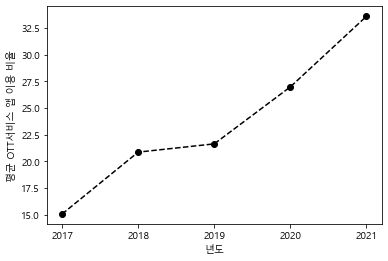

In [4]:
application = pd.read_csv("data/자주사용하는앱.csv", header=[0,1], index_col=[0,1])

data = {"2017" : application["2017"]["방송/동영상(OTT 서비스 등) (%)"], "2018": application["2018"]["방송/동영상(OTT 서비스 등) (%)"],
        "2019": application["2019"]["방송/동영상(OTT 서비스 등) (%)"],"2020": application["2020"]["방송/동영상(OTT 서비스 등) (%)"],
        "2021": application["2021"]["방송/동영상(OTT 서비스 등) (%)"]}
OTT_application = pd.DataFrame(data=data)

OTT_application_age = OTT_application.loc["연령"]
OTT_application_age

OTT_application_age = OTT_application_age.astype(float)
OTT_application_age.loc["mean"]=OTT_application_age.mean()

plt.plot(OTT_application_age.loc["mean"], color = "black", linestyle = "--", marker = "o")
# 다운로드 받은 앱 중 OTT관련 앱을 자주 사용하는 사람들의 비율의 평균은 계속 증가하고 있다.

plt.xlabel("년도")
plt.ylabel("평균 OTT서비스 앱 이용 비율")

### (2) 설문조사 결과 : 2020년과 2021년의 최근 3개월 OTT서비스 이용경험 비율 변화 확인

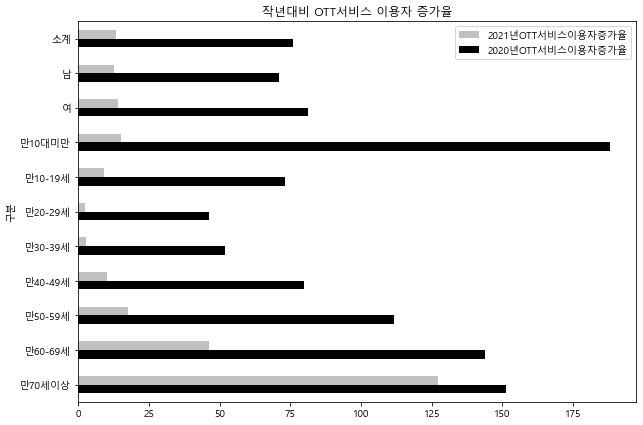

In [43]:
user = pd.read_excel("data/최근3개월OTT서비스이용경험.xlsx", header=[0,1], index_col=[0,1])

userincrease = pd.DataFrame({"2021년OTT서비스이용자증가율":round((user["2021"]["이용경험 있음 (%)"]-user["2020"]["이용경험 있음 (%)"])/user["2020"]["이용경험 있음 (%)"] *100,2),
                            "2020년OTT서비스이용자증가율":round((user["2020"]["이용경험 있음 (%)"]-user["2019"]["이용경험 있음 (%)"])/user["2019"]["이용경험 있음 (%)"] *100,2)})
#userincrease.columns = ["이용자증가율"]
userincrease

unserincrease_graph = userincrease.droplevel(level=0)
ax = unserincrease_graph.plot(kind = "barh", color = {"2020년OTT서비스이용자증가율":"black", "2021년OTT서비스이용자증가율":"silver"},
                              figsize = (10,7), xlabel = "구분", title ="작년대비 OTT서비스 이용자 증가율")
ax.invert_yaxis()



### (3) 설문조사 결과 : 가장 많이 이용하는 OTT서비스_영화서비스 이용률 변화 확인

In [20]:
OTT = pd.read_excel("data/가장많이이용하는OTT서비스_20-21.xlsx", header=[0,1], index_col=[0,1])
OTT.columns =[["2020","2020","2020","2020","2020","2020","2020","2020","2020","2021","2021","2021","2021","2021","2021","2021","2021","2021","2021"], ["사례수","국내TV", "해외TV", "실시간TV", "영화", "OTT자체제작", "예능/오락(개인방송포함)", "음악", "기타","사례수", "영화", "예능/오락(개인방송포함)", "드라마","교양/다큐","교육/학습","애니메이션","스포츠","뉴스","기타"]]

OTT_movie = pd.DataFrame([OTT["2020"]["영화"], OTT["2021"]["영화"]], index=["2020","2021"]).T
OTT_movie["OTT영화시청증감률"]=(OTT_movie["2021"]-OTT_movie["2020"])/OTT_movie["2020"]*100


# 추가로 2020년과 2021년의 또다른 공통 컬럼인 예능/오락부분도 추가해서 비교하겠다.

OTT_예능오락 = pd.DataFrame([OTT["2020"]["예능/오락(개인방송포함)"], OTT["2021"]["예능/오락(개인방송포함)"]], index=["2020","2021"]).T
OTT_예능오락["OTT예능/오락시청증감률"]=(OTT_예능오락["2021"]-OTT_예능오락["2020"])/OTT_예능오락["2020"]*100


# OTT시청의 증감률을 확인하고 우리가 알아보고자 하는 OTT에서 영화를 보는 시청 증감률이 차이를 비교하기 위해 dataframe을 합쳐준다

change = pd.concat([OTT_movie["OTT영화시청증감률"], OTT_예능오락["OTT예능/오락시청증감률"]], axis=1)
change = change.astype(int)
change = change.droplevel(level=0, axis=0)
change.columns.names = ["장르"]
change = change.rename(index = {"소계" : "전체"})
change.head()

장르,OTT영화시청증감률,OTT예능/오락시청증감률
전체,72,10
남,56,4
여,93,16
만10대미만,153,-16
만10-19세,93,11


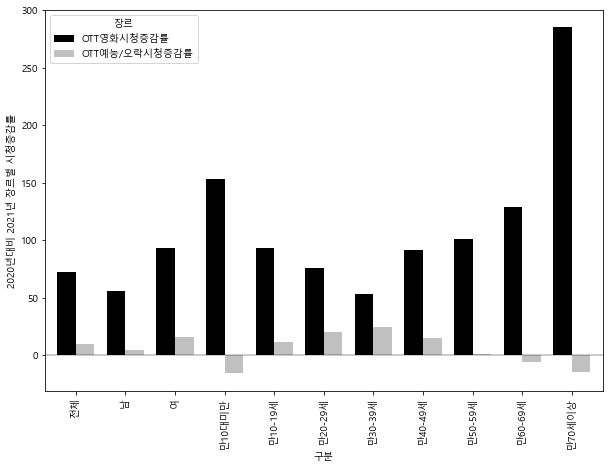

In [22]:
ax = change.plot(kind = "bar", color = {"OTT영화시청증감률":"black", "OTT예능/오락시청증감률":"silver"},
                 figsize = (10,7), width = 0.75, xlabel = "구분", ylabel="2020년대비 2021년 장르별 시청증감률")
plt.axhline(y=0, color = "black", linewidth = 0.4)

## 3) 코로나 시기의 영화관 이용자 수 변화

### (1) 2018년부터 2022년까지의 영화관 이용자 수 변화 확인

### (1)-1 영화관 관객수 변화 확인

Text(0, 0.5, '관객수')

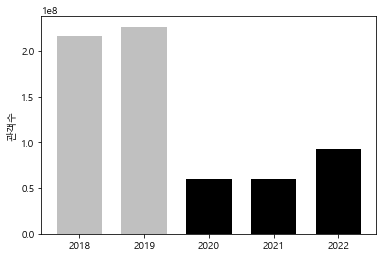

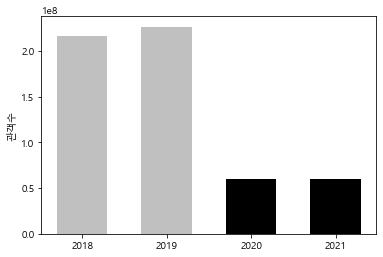

In [25]:
movietheater = pd.read_excel("data/영화관객수및매출액_2018-2022.xlsx", header=[0,1], index_col=[0])
theater = pd.DataFrame(movietheater["전체"]["관객수"])
theater_graph = theater.iloc[:-1]
theater_graph_2021 = theater.iloc[:-2]

plt.figure(figsize=(6,4)) 
colors = ["silver",'silver','black','black','black']
plt.bar(theater_graph.index, theater_graph["관객수"], color=colors, width = 0.7)
plt.ylabel('관객수')

# 현재 사용하고 있는 자료들의 값이 2021년이 최대이기 때문에 2021년까지만 확인
plt.figure(figsize=(6,4)) 
colors = ["silver",'silver','black','black']
x = ["2018", "2019", "2020", "2021"]
plt.bar(x, theater_graph_2021["관객수"], color=colors, width = 0.6)
plt.ylabel('관객수')

### (1)-2 설문조사 결과 : 여가시간에 영화관을 이용하는 사람들 비율 변화 확인

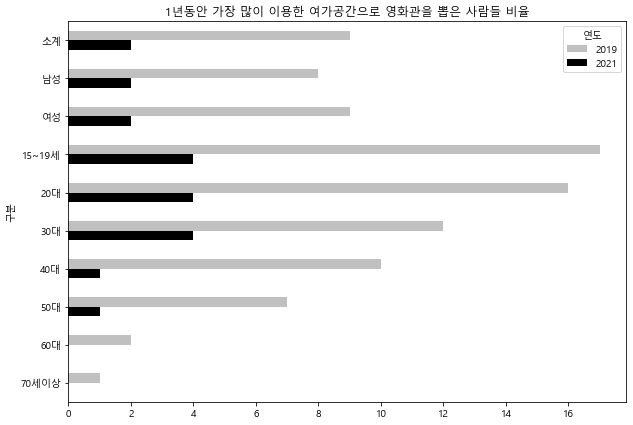

In [42]:
sparemovie= pd.read_csv("data/1년동안가장많이이용한여가공간1순위_영화관비율.csv", encoding="euc-kr", header=[0,1], index_col=[0,1])

# 위의 OTT 시청자 구분 맞춰주기(전체, 성별, 연령별)
# 코로나로 인한 영화 관람객 수의 변화를 극단적으로 살펴보기 위하여 2019년과 2021년을 비교

sparetheater = sparemovie.loc[["전체","성별","연령별"],["2019","2021"]]

sparetheater = sparetheater.astype(float)
sparetheater = sparetheater.astype(int)
sparetheater = sparetheater.droplevel(level=1, axis=1)
sparetheater = sparetheater.droplevel(level=0, axis=0)
sparetheater.columns.names = ["연도"]

ax = sparetheater.plot.barh(color = {"2019":"silver", "2021":"black"}, figsize = (10,7),
                      xlabel = "구분", title = "1년동안 가장 많이 이용한 여가공간으로 영화관을 뽑은 사람들 비율")
ax.invert_yaxis()

### (2) 코로나 확진자 수와 영화관 관객수의 상관관계 확인

### (2)-1 월별 코로나 확진자 수와 월별 영화관 관객수의 상관 관계확인

In [46]:
# 코로나 시기의 월별 영화관 관람객 수 확인

twenty = pd.read_excel("data/2020영화관람객수.xlsx", skiprows = 4, header=[0,1])
twenty = twenty.iloc[:, [0,-1]].droplevel(level=1, axis=1)
twenty.columns = ["년월","관람객수"]
twenty = twenty.iloc[0:12]
twenty["년월"]=pd.to_datetime(twenty["년월"])
twenty["년월"] = twenty["년월"].dt.strftime("%Y-%m")

twoone = pd.read_excel("data/2021영화관람객수.xlsx", skiprows = 4, header=[0,1])
twoone = twoone.iloc[:, [0,-1]].droplevel(level=1, axis=1)
twoone.columns = ["년월","관람객수"]
twoone = twoone.iloc[0:12]
twoone["년월"]=pd.to_datetime(twoone["년월"])
twoone["년월"] = twoone["년월"].dt.strftime("%Y-%m")

movie = pd.concat([twenty, twoone])
movie.head()

,년월,관람객수
0,2020-01,16843695
1,2020-02,7372370
2,2020-03,1834722
3,2020-04,972572
4,2020-05,1526236


### (2)-2 코로나 확진자 수와 영화 관람객 수 상관관계 확인

In [47]:
# 월별 코로나 확진자 수 관람객 수와 형식 맞춰주기
corona_month = pd.read_csv("data/월별확진자수.csv")
corona_month["date"] = pd.to_datetime(corona_month["date"])
corona_month["date"] = corona_month["date"].dt.strftime("%Y-%m")
corona_month.head()

# 월별 코로나 확진자 수와 월별 관람객 수 한 dataframe으로 만들기

corona_movie_m = pd.merge(movie, corona_month, how = "inner", left_on="년월", right_on="date" )
corona_movie_m = corona_movie_m[["년월","관람객수","covid"]]
corona_movie_m.to_csv("data/월별_영화_코로나.csv", index=False)

# 월별 코로나 확진자 수와 영화 관람객 수 상관관계 확인

import scipy.stats as stats

correlation = stats.pearsonr(corona_movie_m["관람객수"], corona_movie_m["covid"])
pd.DataFrame(correlation, index=["상관계수", "p-value"], columns=["코로나.관람객"])

,코로나.관람객
상관계수,0.512176
p-value,0.012470


뉴스나 다른 매체의 이야기와 달리 코로나 확진자가 늘수록 영화 관람객 수가 는다고 표현할 수 있는 0.5121의 양의 상관관계로 나타남

이유를 생각해보자

- 코로나가 시작된지 1년이 지난 2021년부터는 사람들이 코로나에 상관없이 영화관을 가지 않았을까
- 이번 달의 코로나 확진자 수가 다음 달의 영화 관람객 수에 영향을 미쳤을 것이다

#### (2)-2-1 코로나가 시작된지 1년이 지난 2021년부터는 사람들이 코로나에 상관 없이 영화관을 이용하였는가

In [48]:
corona_movie20 = corona_movie_m.iloc[:11]
corona_movie21 = corona_movie_m.iloc[11:]

import scipy.stats as stats

corr20 = stats.pearsonr(corona_movie20["관람객수"], corona_movie20["covid"])
cor20 = pd.DataFrame(corr20, index=["상관계수", "p-value"], columns=["코로나.관람객20"])

corr21 = stats.pearsonr(corona_movie21["관람객수"], corona_movie21["covid"])
cor21 = pd.DataFrame(corr21, index=["상관계수", "p-value"], columns=["코로나.관람객21"])

display(cor20)
display(cor21)

,코로나.관람객20
상관계수,-0.244801
p-value,0.468147


,코로나.관람객21
상관계수,0.747431
p-value,0.005200


#### (2)-2-2 이번달의 코로나 확진자 수가 다음달의 영화 관람객 수에 영향을 미쳤는가

In [49]:
# 위에서 사용한 corona_movie_m 사용
corona_movie_m.head()

first_corona = corona_movie_m.iloc[0:-1].reset_index()
next_movie = corona_movie_m.iloc[1:].reset_index()

import scipy.stats as stats

corr = stats.pearsonr(next_movie["관람객수"], first_corona["covid"])
pd.DataFrame(corr, index=["상관계수", "p-value"], columns=["코로나.관람객.다음달"])

,코로나.관람객.다음달
상관계수,0.514647
p-value,0.014257


In [52]:
covid_first = first_corona[["년월","covid"]]
movie_next = next_movie[["년월","관람객수"]]

next_corona_movie = pd.concat([covid_first, movie_next], axis=1)

next_corona_movie20 = next_corona_movie.iloc[:11]
next_corona_movie21 = next_corona_movie.iloc[11:]

import scipy.stats as stats

corr20_next = stats.pearsonr(next_corona_movie20["관람객수"], next_corona_movie20["covid"])
cor20_next = pd.DataFrame(corr20_next, index=["상관계수", "p-value"], columns=["코로나.관람객.다음달20"])

corr21_next = stats.pearsonr(next_corona_movie21["관람객수"], next_corona_movie21["covid"])
cor21_next = pd.DataFrame(corr21_next, index=["상관계수", "p-value"], columns=["코로나.관람객.다음달21"])

display(cor20_next)
display(cor21_next)

,코로나.관람객.다음달20
상관계수,-0.376218
p-value,0.254136


,코로나.관람객.다음달21
상관계수,0.689357
p-value,0.018941


2020년은 코로나확진자 수가 증가할 수록 영화관 관객수가 줄어든 음의 상관관계를 보였지만 54%의 신뢰성을 보였다.
반대로 2021년은 99.5%의 신뢰도로 코로나 확진자수가 증가함에도 불구하고 영화관 관객수가 증가하는 경향을 보였다.
따라서 코로나 확진자 수가 영화관 관객수에 큰 영향을 미치지 못했다고 볼 수 있다.

추가로 음의 상관관계의 신뢰성 확인을 위해 2020년에 지난달의 코로나 확진자 수가 영화관 관람에 영향을 미쳤는지 확인해 보았을 때는 75%의 신뢰도로 코로나 확진자 수가 증가할 때 영화관 관객 수가 감소하는 경향을 음의 상관관계를 보여 조금 더 유의한 수준으로 코로나 확진자 수가 영화관람객수에 영향을 주었다고 볼 수 있다.

그렇다면 일별 코로나 확진자 수와 일별 영화관 관객수의 상관관계는 어떠할까

### (2)-3 일별 코로나 확진자 수와 일별 영화관 관객 수의 상관관계 확인

In [20]:
# 2020년 2월부터 2021년 12월까지의 일별 코로나 확진자수
day_covid = pd.read_csv("data/일별확진자수.csv")
day_covid = day_covid.iloc[:int(day_covid[day_covid["stateDt"]=="2021-12-31"].index.values)+1]

In [23]:
# 2020년 2월부터 2021년 12월까지 일별 영화관 관객수

#20년 
movie_day20 = pd.read_excel("data/일별영화관객수_20.02.xlsx")
for i in range(3,13):
    if i < 10:
        a = str(0)+str(i)
    else:
        a = str(i)
    name = "data/일별영화관객수_20."+ a +".xlsx"
    add = pd.read_excel(name)
    movie_day20 = pd.concat([movie_day20, add])
    
# 21년
movie_day21 = pd.read_excel("data/일별영화관객수_21.01.xlsx")
for i in range(2,13):
    if i < 10:
        a = str(0)+str(i)
    else:
        a = str(i)
    name = "data/일별영화관객수_21."+ a +".xlsx"
    add = pd.read_excel(name)
    movie_day21 = pd.concat([movie_day21, add])
    
movie_day = pd.concat([movie_day20, movie_day21])
movie_day.columns = ["stateDt", "관객수"]

In [26]:
movie_day["stateDt"] = movie_day["stateDt"].astype("str")

In [31]:
covid_movie_day = pd.merge(movie_day, day_covid, how="inner", on="stateDt")
covid_movie_day.to_csv("data/일별_영화_코로나.csv", index=False)

In [32]:
import scipy.stats as stats

corr = stats.pearsonr(covid_movie_day["관객수"], covid_movie_day["covid"])
pd.DataFrame(corr, index=["상관계수", "p-value"], columns=["코로나.관람객"])
# 상관관계가 없음

,코로나.관람객
상관계수,2.431171e-01
p-value,1.363204e-10


#### (2)-3-1 코로나가 시작된지 1년이 지난 2021년부터는 사람들이 코로나에 상관 없이 영화관을 이용하였는가

In [41]:
covid_movie_d20 = covid_movie_day.iloc[:int(covid_movie_day[covid_movie_day["stateDt"]=="2020-12-31"].index.values)+1]
covid_movie_d21 = covid_movie_day.iloc[int(covid_movie_day[covid_movie_day["stateDt"]=="2020-12-31"].index.values)+1:]

corr20 = stats.pearsonr(covid_movie_d20["관객수"], covid_movie_d20["covid"])
cor20 = pd.DataFrame(corr20, index=["상관계수", "p-value"], columns=["코로나.관람객"])

corr21 = stats.pearsonr(covid_movie_d21["관객수"], covid_movie_d21["covid"])
cor21 = pd.DataFrame(corr21, index=["상관계수", "p-value"], columns=["코로나.관람객"])

display(cor20)
display(cor21)

,코로나.관람객
상관계수,-0.208406
p-value,0.000125


,코로나.관람객
상관계수,3.031012e-01
p-value,9.185106e-09


#### (2)-3-2 어제의 코로나 확진자 수가 오늘의 영화 관람객 수에 영향을 미쳤는가

In [33]:
# 코로나 확진자 수가 다음날 영화관객수에 영향을 미쳤다
covid_first_day = covid_movie_day.iloc[:-1]
movie_next_day = covid_movie_day.iloc[1:]

import scipy.stats as stats

corr = stats.pearsonr(movie_next_day["관객수"], covid_first_day["covid"])
pd.DataFrame(corr, index=["상관계수", "p-value"], columns=["코로나.관람객.다음날"])
# 상관관계가 없음

,코로나.관람객.다음날
상관계수,2.389584e-01
p-value,2.935572e-10


In [58]:
covid_first_covid = covid_first_day[["stateDt","covid"]].reset_index(drop=True)
movie_next_movie = movie_next_day[["stateDt","관객수"]].reset_index(drop=True)
next_corona_movie_d = pd.concat([covid_first_covid, movie_next_movie], axis=1)

next_corona_movie_d20 = next_corona_movie_d.iloc[:int(covid_movie_day[covid_movie_day["stateDt"]=="2020-12-31"].index.values)+1]
next_corona_movie_d21 = next_corona_movie_d.iloc[int(covid_movie_day[covid_movie_day["stateDt"]=="2020-12-31"].index.values)+1:]


next_corr20 = stats.pearsonr(next_corona_movie_d20["관객수"], next_corona_movie_d20["covid"])
next_cor20 = pd.DataFrame(next_corr20, index=["상관계수", "p-value"], columns=["코로나.관람객.다음날20"])

next_corr21 = stats.pearsonr(next_corona_movie_d21["관객수"], next_corona_movie_d21["covid"])
next_cor21 = pd.DataFrame(next_corr21, index=["상관계수", "p-value"], columns=["코로나.관람객.다음날21"])

display(next_cor20)
display(next_cor21)

,코로나.관람객.다음날20
상관계수,-0.223516
p-value,0.000038


,코로나.관람객.다음날21
상관계수,2.946166e-01
p-value,2.569275e-08


2020년은 99%이상의 유의수준에서 코로나확진자 수가 증가할 수록 영화관 관객수가 줄어든 음의 상관관계를 보였다.
반대로 2021년은 99% 이상의 유의수준에서 코로나 확진자수와 코로나 관람객 사이에 영향이 없다는 것을 볼 수 있었다.

즉, 2020년은 코로나 확진자 수가 영화관 관람객 수에 영향을 주었지만 2021년은 영향을 주지 못한 것을 알 수 있었다.
그 원인을 사람들의 코로나에 대한 인식에서 찾아보고자 한다. 

## 4) 2020년과 2021년의 코로나에 대한 인식 확인

- 해당 기간의 뉴스를 크롤링(네이버: 코로나19로 검색)
    - 관련도 순으로 검색했을 때 80개 뉴스가 넘어가면 관련도가 매우 낮아짐(80개까지만 확인하겠다)
- WordCloud를 이용

In [53]:
# 필요 모듈 import

# 크롤링
from urllib.request import urlopen
from bs4 import BeautifulSoup

# 텍스트 마이닝 및 wordcloud
from konlpy.tag import Okt  
import nltk
from wordcloud import WordCloud

### (1) 비교할 달 확인

In [52]:
month_covid = pd.read_csv("data/월별확진자수.csv")
month_covid.sort_values(by="covid")
# 코로나 확진자 수가 비슷한 달인 20년 12월과 21년 4월을 비교해보자

,date,covid
3,2020-05-01,703.0
2,2020-04-01,979.0
4,2020-06-01,1332.0
5,2020-07-01,1505.0
8,2020-10-01,2699.0
0,2020-02-01,2931.0
7,2020-09-01,3865.0
6,2020-08-01,5642.0
1,2020-03-01,6855.0
9,2020-11-01,7690.0


### (1)-1 20년 12월과 21년 4월의 코로나 확진자 수와 관람객 비교

,년월,구분,명(코로나*25)
0,2020-12,covid,663475.0
1,2020-12,관람객수,1438873.0
2,2021-04,covid,472975.0
3,2021-04,관람객수,2562285.0


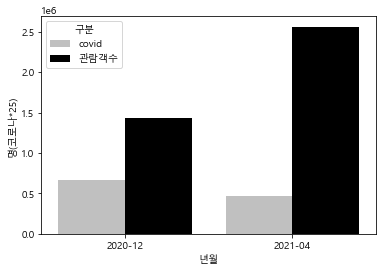

In [3]:
# 상관관계를 확인 했을 때 저장해둔 파일 사용
month_covid_movie = pd.read_csv("data/월별_영화_코로나.csv")
graph = month_covid_movie[month_covid_movie["년월"].isin(["2020-12","2021-04"])]

graph["covid"] = graph["covid"]*25
melt_graph = pd.melt(graph, id_vars=["년월"], value_vars=["covid","관람객수"]).sort_values(by="년월").reset_index(drop=True)
melt_graph.columns = ["년월","구분","명(코로나*25)"]
sns.barplot("년월","명(코로나*25)",data=melt_graph, hue="구분", palette=["silver","black"])
melt_graph

2020년 12월과 2021년 4월은 어느정도 코로나 확진자 수가 크게 차이나지 않지만 반대로 영화관 관람객 수는 굉장히 차이가 많이 나는 것을 확인할 수 있다.

### (2) 2020년 12월 코로나19에 대한 뉴스 헤드라인

In [55]:
## 크롤링

news20 = []
list = ["https://search.naver.com/search.naver?where=news&query=%EC%BD%94%EB%A1%9C%EB%82%9819&sm=tab_opt&sort=0&photo=4&field=0&pd=3&ds=2020.12.01&de=2020.12.31&docid=&related=0&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so%3Ar%2Cp%3Afrom20201201to20201231&is_sug_officeid=0",
"https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EC%BD%94%EB%A1%9C%EB%82%9819&sort=0&photo=4&field=0&pd=3&ds=2020.12.01&de=2020.12.31&cluster_rank=10&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:from20201201to20201231,a:all&start=11",
"https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EC%BD%94%EB%A1%9C%EB%82%9819&sort=0&photo=4&field=0&pd=3&ds=2020.12.01&de=2020.12.31&cluster_rank=20&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:from20201201to20201231,a:all&start=21",
"https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EC%BD%94%EB%A1%9C%EB%82%9819&sort=0&photo=4&field=0&pd=3&ds=2020.12.01&de=2020.12.31&cluster_rank=30&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:from20201201to20201231,a:all&start=31",
"https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EC%BD%94%EB%A1%9C%EB%82%9819&sort=0&photo=4&field=0&pd=3&ds=2020.12.01&de=2020.12.31&cluster_rank=40&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:from20201201to20201231,a:all&start=41",
"https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EC%BD%94%EB%A1%9C%EB%82%9819&sort=0&photo=4&field=0&pd=3&ds=2020.12.01&de=2020.12.31&cluster_rank=50&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:from20201201to20201231,a:all&start=51",
"https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EC%BD%94%EB%A1%9C%EB%82%9819&sort=0&photo=4&field=0&pd=3&ds=2020.12.01&de=2020.12.31&cluster_rank=60&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:from20201201to20201231,a:all&start=61",
"https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EC%BD%94%EB%A1%9C%EB%82%9819&sort=0&photo=4&field=0&pd=3&ds=2020.12.01&de=2020.12.31&cluster_rank=70&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:from20201201to20201231,a:all&start=71"]
for li in list:
    page = urlopen(li)
    soup = BeautifulSoup(page, "html.parser")
    title20 = soup.find("ul", class_ = "list_news").find_all("a", class_="news_tit")
    for i in range(int(len(title20))):
        text = title20[i].get_text()
        news20.append(text)

        
## 텍스트 마이닝

okt = Okt()
text20 = []
for i in range(int(len(news20))):
    noun = okt.nouns(news20[i])
    for j in noun:
        text20.append(j)
text20

# 불용어 처리

#불용어 사전 만들기
stop_words = ["위","제","속","및","로","간", "비즈","첫","날","풀","더","명","비","등","내","개","이후","번가","수","위해","진"]
# 밑의 글자 빈도수 list를 참고해서 불용어 넣어주기
text20 = [each_word for each_word in text20 if each_word not in stop_words]

# 빈도수 처리(워드 카운팅)
ko = nltk.Text(text20, name="코로나2020뉴스")

data = ko.vocab().most_common(100)
data

[('코로나', 76),
 ('극복', 10),
 ('위기', 9),
 ('치료', 8),
 ('센터', 7),
 ('시대', 7),
 ('백신', 5),
 ('나눔', 5),
 ('방역', 5),
 ('발표', 4),
 ('사회', 4),
 ('시장', 4),
 ('계층', 4),
 ('지원', 4),
 ('청소년', 4),
 ('한국', 3),
 ('공유', 3),
 ('공단', 3),
 ('청년', 3),
 ('생활', 3),
 ('상황', 3),
 ('상생', 3),
 ('경영', 3),
 ('바이오', 3),
 ('개발', 3),
 ('환자', 3),
 ('비대', 3),
 ('교육', 3),
 ('공급', 3),
 ('여파', 3),
 ('취약', 3),
 ('대응', 3),
 ('의료', 3),
 ('충남', 3),
 ('산업', 3),
 ('시간', 3),
 ('긴급', 3),
 ('돈', 3),
 ('분양', 3),
 ('글로벌', 3),
 ('학술', 2),
 ('대회', 2),
 ('최신', 2),
 ('최대', 2),
 ('제공', 2),
 ('그룹', 2),
 ('제약', 2),
 ('혈장', 2),
 ('기부', 2),
 ('팬데믹', 2),
 ('가치', 2),
 ('선도', 2),
 ('재난', 2),
 ('온라인', 2),
 ('시상식', 2),
 ('코리아', 2),
 ('소외', 2),
 ('체결', 2),
 ('올해', 2),
 ('대상', 2),
 ('가이던스', 2),
 ('영업', 2),
 ('진료', 2),
 ('아동', 2),
 ('예스', 2),
 ('포스트', 2),
 ('판매량', 2),
 ('급증', 2),
 ('관심', 2),
 ('상승', 2),
 ('주방', 2),
 ('프로젝트', 2),
 ('필수', 2),
 ('금천구', 2),
 ('시설', 2),
 ('관리', 2),
 ('누리', 2),
 ('교회', 2),
 ('희망이', 2),
 ('시스템', 2),
 ('중국', 2),
 ('문화', 2)

(-0.5, 399.5, 199.5, -0.5)

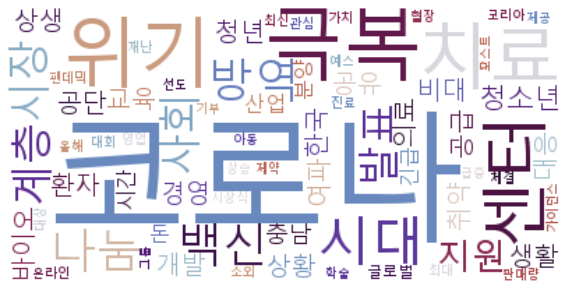

In [56]:
## 워드 클라우드 출력
import matplotlib.pyplot as plt
wc=WordCloud(max_font_size=100, background_color = "white",max_words=70, 
             font_path="C:/Windows/Fonts/malgun.ttf", colormap = 'twilight').generate_from_frequencies(dict(data))

plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")

2020년에는 극복, 위기, 치료, 센터, 백신, 방역 등의 코로나로 인해 발생한 문제를 파악하고 코로나를 치료하는데 중점을 둔 뉴스가 많다

### (3) 2021년 4월 코로나19에 대한 뉴스 헤드라인

In [61]:
## 크롤링

news21 = []
list = ["https://search.naver.com/search.naver?where=news&query=%EC%BD%94%EB%A1%9C%EB%82%9819&sm=tab_opt&sort=0&photo=4&field=0&pd=3&ds=2021.04.01&de=2021.04.30&docid=&related=0&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so%3Ar%2Cp%3Afrom20210401to20210430&is_sug_officeid=0",
"https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EC%BD%94%EB%A1%9C%EB%82%9819&sort=0&photo=4&field=0&pd=3&ds=2021.04.01&de=2021.04.30&cluster_rank=10&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:from20210401to20210430,a:all&start=11",
"https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EC%BD%94%EB%A1%9C%EB%82%9819&sort=0&photo=4&field=0&pd=3&ds=2021.04.01&de=2021.04.30&cluster_rank=20&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:from20210401to20210430,a:all&start=21",
"https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EC%BD%94%EB%A1%9C%EB%82%9819&sort=0&photo=4&field=0&pd=3&ds=2021.04.01&de=2021.04.30&cluster_rank=30&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:from20210401to20210430,a:all&start=31",
"https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EC%BD%94%EB%A1%9C%EB%82%9819&sort=0&photo=4&field=0&pd=3&ds=2021.04.01&de=2021.04.30&cluster_rank=40&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:from20210401to20210430,a:all&start=41",
"https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EC%BD%94%EB%A1%9C%EB%82%9819&sort=0&photo=4&field=0&pd=3&ds=2021.04.01&de=2021.04.30&cluster_rank=50&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:from20210401to20210430,a:all&start=51",
"https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EC%BD%94%EB%A1%9C%EB%82%9819&sort=0&photo=4&field=0&pd=3&ds=2021.04.01&de=2021.04.30&cluster_rank=61&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:from20210401to20210430,a:all&start=61",
"https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EC%BD%94%EB%A1%9C%EB%82%9819&sort=0&photo=4&field=0&pd=3&ds=2021.04.01&de=2021.04.30&cluster_rank=71&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:from20210401to20210430,a:all&start=71"]

for li in list:
    page = urlopen(li)
    soup = BeautifulSoup(page, "html.parser")
    title21 = soup.find("ul", class_ = "list_news").find_all("a", class_="news_tit")
    for i in range(int(len(title21))):
        text = title21[i].get_text()
        news21.append(text)
    
    
## 텍스트 마이닝
okt = Okt()
text21 = []
for i in range(int(len(news21))):
    noun = okt.nouns(news21[i])
    for j in noun:
        text21.append(j)


# 불용어 처리

#불용어 사전 만들기
stop_words = ["위","제","대한","명","속","명대", "확", "진자", "및", "위해", "길","활","얀","청","비대","더","인","무","닐슨","닉","성","이후","튜브"]
# 밑에서 data로 확인해 본 다음 처리

text21 = [each_word for each_word in text21 if each_word not in stop_words]

# 빈도수 처리(워드 카운팅)
ko = nltk.Text(text21, name="코로나2021뉴스")
data = ko.vocab().most_common(100)
data

[('코로나', 37),
 ('기업', 15),
 ('힘', 10),
 ('지원', 7),
 ('시대', 6),
 ('치료', 6),
 ('백신', 5),
 ('센터', 5),
 ('한국', 5),
 ('발표', 4),
 ('축제', 4),
 ('청소년', 4),
 ('진행', 4),
 ('재단', 4),
 ('시민', 4),
 ('운영', 3),
 ('온라인', 3),
 ('국내', 3),
 ('활동', 3),
 ('환자', 3),
 ('투자', 3),
 ('나눔', 3),
 ('회복', 3),
 ('개발', 3),
 ('사업', 3),
 ('서울', 3),
 ('프로그램', 3),
 ('사회', 3),
 ('협약', 3),
 ('체결', 3),
 ('상생', 3),
 ('참여', 3),
 ('코리아', 2),
 ('변화', 2),
 ('바이오', 2),
 ('출시', 2),
 ('개최', 2),
 ('미래', 2),
 ('대상', 2),
 ('계획', 2),
 ('스타', 2),
 ('극복', 2),
 ('성황리', 2),
 ('글로벌', 2),
 ('브랜드', 2),
 ('솔루션', 2),
 ('출입', 2),
 ('국가', 2),
 ('산업대', 2),
 ('열매', 2),
 ('상공', 2),
 ('추진', 2),
 ('스토어', 2),
 ('복지', 2),
 ('일자리', 2),
 ('문화재단', 2),
 ('학생', 2),
 ('온', 2),
 ('오프라인', 2),
 ('최대', 2),
 ('실적', 2),
 ('세계', 2),
 ('규모', 2),
 ('지속', 2),
 ('경제', 2),
 ('업무', 2),
 ('공간', 2),
 ('활용', 2),
 ('혁신', 2),
 ('지능', 2),
 ('드론', 2),
 ('수소', 2),
 ('앞장', 2),
 ('행복', 2),
 ('그룹', 2),
 ('학습', 2),
 ('협력', 2),
 ('인테리어', 2),
 ('데이터', 2),
 ('방역', 2),
 ('포스트', 1),
 ('소비

(-0.5, 399.5, 199.5, -0.5)

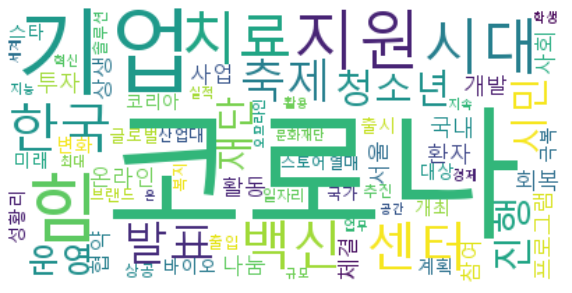

In [62]:
### 워드 클라우드 출력
import matplotlib.pyplot as plt
wc=WordCloud(max_font_size=100, background_color = "white",max_words=70, 
             font_path="C:/Windows/Fonts/malgun.ttf",  colormap = 'viridis').generate_from_frequencies(dict(data))


plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")

2021년에도 여전히 치료, 백신과 같은 코로나를 이겨내는 것에 관심을 두고 있지만 2020년과 달리 기업이나 힘, 축제와 같은 조금 더 활동적인 것에 관련된 단어들이 많다.

따라서 앞으로 사람들은 코로나에 상관 없이 영화관을 이용할 것이고 조금 더 활동적인 활동들을 하는 사람들도 증가할 것으로 보인다.

하지만 그렇다고해서 OTT서비스 이용자들이 감소하고 있지는 않다. 그 이유는 무엇일까?

# 2. OTT서비스 이용자들의 OTT서비스 이용 특성

## 1) OTT서비스를 이용하는 사람들은 OTT서비스를 어떻게 이용하고 있을까?

### (1) 설문조사 결과 : OTT 서비스 이용빈도

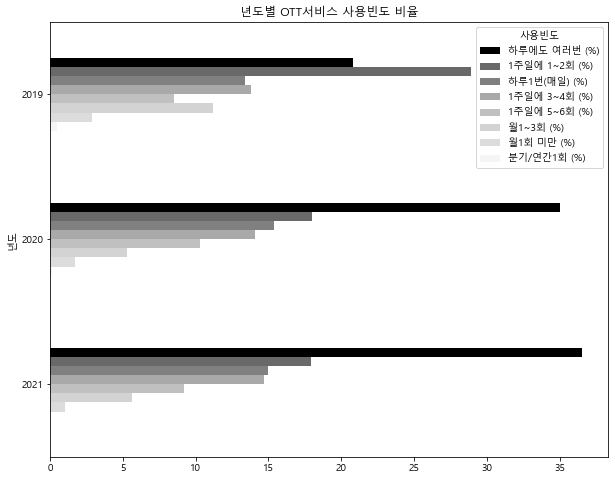

In [64]:
frequency = pd.read_csv("data/OTT서비스_이용빈도.csv", header=[0,1], index_col=[0,1])
frequency19 = frequency.loc["전체","2019"].T.sort_values(by="소계", ascending=False)
frequency19.columns = ["2019"]
frequency20 = frequency.loc["전체","2020"].T.sort_values(by="소계", ascending=False)
frequency20.columns = ["2020"]
frequency21 = frequency.loc["전체","2021"].T.sort_values(by="소계", ascending=False)
frequency21.columns = ["2021"]

frequency_total = pd.concat([frequency19, frequency20, frequency21], axis=1)
frequency_total = frequency_total.drop("사례수 (명)")
frequency_total.index.name = "사용빈도"
frequency_total = frequency_total.sort_values(by="2020", ascending=False)
frequency_total_graph = frequency_total.T

ax = frequency_total_graph.plot(kind="barh",
                                color = ["black","dimgray", "gray","darkgray","silver","lightgray","gainsboro","whitesmoke"],
                                figsize=(10,8), xlabel="년도", title="년도별 OTT서비스 사용빈도 비율")
ax.invert_yaxis()

### (2) 설문조사 결과 : OTT서비스 한 번 이용시 얼마나 오래 이용하는가?

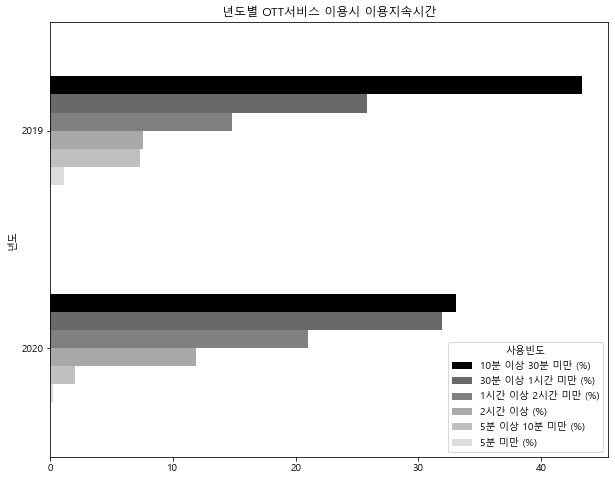

In [70]:
time = pd.read_csv("data/OTT서비스_이용시간.csv", header=[0,1], index_col=[0,1])

time19 = time.loc["전체","2019"].T.sort_values(by="소계", ascending=False)
time19.columns = ["2019"]
time20 = time.loc["전체","2020"].T.sort_values(by="소계", ascending=False)
time20.columns = ["2020"]
time_total = pd.concat([time19, time20], axis=1)
time_total = time_total.drop("사례수 (명)")
time_total.index.name = "사용빈도"
time_total_graph = time_total.T

ax = time_total_graph.plot(kind="barh",
                           color = ["black","dimgray", "gray","darkgray","silver","gainsboro"],
                           figsize=(10,8), xlabel="년도", title="년도별 OTT서비스 이용시 이용지속시간")
ax.invert_yaxis()

### (3) 설문조사 결과 : OTT서비스를 이용하는 상황

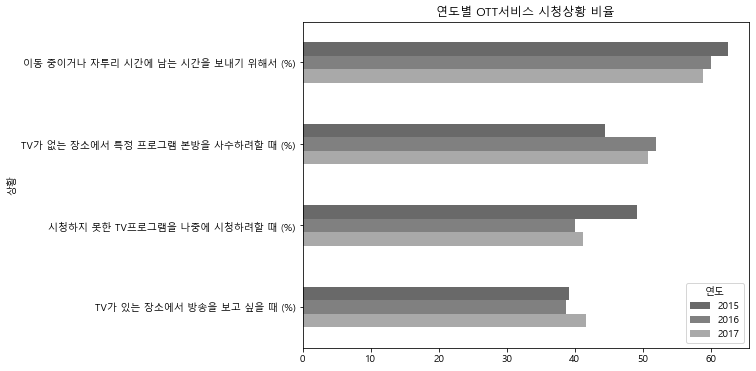

In [72]:
when = pd.read_excel("data/OTT서비스시청상황.xlsx", header=[0,1], index_col=[0])

when_graph = when.T
when_graph = when_graph[["전체"]]
when_graph.index.names = ["연도", "상황"]
when_graph = when_graph.unstack("연도")
when_graph = when_graph.droplevel(level=0, axis=1)
when_graph = when_graph.sort_values(["2016","2017"], ascending=False)

ax = when_graph.plot(kind="barh", color = ["dimgray", "gray","darkgray","silver","gainsboro"],
                     figsize=(8,6), title="연도별 OTT서비스 시청상황 비율")
ax.invert_yaxis()

OTT서비스는 하루에 여러번 1시간 미만의 짧은 시간동안 이용하는 경우가 많다. 그 이유는 이동 중에 이용하거나 TV가 없는 장소에서 사용하기 때문이라고 볼 수 있다. 즉, OTT서비스는 영상을 짧게 소비하는데 많이 사용된다. 

## 2) OTT 서비스를 왜 이용하지 않을까?

### (1) 해외 OTT서비스 비가입 이유

In [44]:
reason = pd.read_csv("data/해외유료OTT서비스비가입이유.csv", encoding="euc-kr", index_col=[0,1,2,3,4])
reason1 = reason.iloc[0:5].droplevel(["연번","조사연도","분류", "구분"]).T

England = reason1.sort_values("영국", ascending=False)["영국"].head(6)
Austrailia = reason1.sort_values("호주", ascending=False)["호주"].head(6)
Russia = reason1.sort_values("러시아", ascending=False)["러시아"].head(6)
Brazil = reason1.sort_values("브라질", ascending=False)["브라질"].head(6)
UAE = reason1.sort_values("UAE", ascending=False)["UAE"].head(6)

list1 = [England, Austrailia, Russia, Brazil, UAE]

reasontotal = pd.concat(list1, axis=1)
reasontotal

,영국,호주,러시아,브라질,UAE
사례수(명),66.0,118.0,59.0,56.0,55.0
이용요금이비싸서(비율),30.3,24.6,28.8,25.0,14.5
지상파TV나유료방송으로도충분해서(비율),28.8,29.7,32.2,19.6,16.4
이용방법을잘몰라서(비율),9.1,7.6,6.8,10.7,NaN
특별히볼만한재미있고좋은콘텐츠가없어서(비율),6.1,NaN,8.5,NaN,9.1
외국서비스를이용하는것을좋아하지않아서(비율),6.1,7.6,NaN,NaN,12.7
가입방법을잘몰라서(비율),NaN,5.1,5.1,14.3,12.7
온라인동영상서비스(OTT)가만족스럽지않아서(비율),NaN,NaN,NaN,5.4,NaN


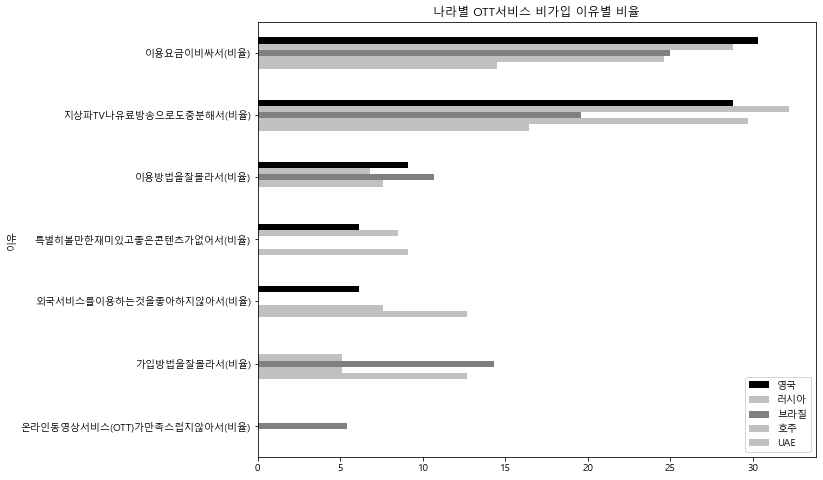

In [47]:
# 위에서 사용한 reasontotal 계속 이용

reason_graph = reasontotal.drop(index = "사례수(명)" )
reason_graph = reason_graph[["영국","러시아","브라질","호주","UAE"]]
ax = reason_graph.plot(kind = "barh", color = {"영국":"black","러시아":"silver","브라질":"gray","호주":"silver","UAE":"silver"},
                       figsize = (10,8), xlabel="이유", title="나라별 OTT서비스 비가입 이유별 비율")
ax.invert_yaxis()

해외 사례이긴 하지만 사람들은 요금에 가장 큰 비중을 두는 것을 알 수 있다.

- 영국과 브라질에서는 이용요금이 비싸서라는 이유가 가장 높음 

- 다른 나라의 경우 지상파TV나 유료방송으로도 충분해서라는 비율이 가장 높고 그 다음이 이용요금이 비싸서라는 이유지만 사실 두 이유의 차이는 크지 않다고 생각된다.
(두 이유 모두 추가로 돈을 지불하면서까지 OTT서비스를 이용할 필요성을 못 느끼는 것이라고도 생각할 수 있기 때문에)

### (1)-1 영화관객수도 가격에 영향을 받을까?

- 티켓 가격이 달라진 때의 관객수를 확인해보자

티켓 가격 변동 내용 참고

- https://post.naver.com/viewer/postView.naver?volumeNo=31753842&memberNo=31724756

2008.5월 8000원

2009.7월 9000원

2013.2월 10000원

2014.2월 10000원(2D, 3D차등제 실시)

2016.4월 11000원(프라임존)

2018.4월 12000원(프라임존)

2020.10월 13000원(좌석 차등제 폐지)

2021.3월 14000원


In [65]:
# 티켓 가격이 변동한 때를 중심으로 앞뒤 1년씩 관객수 확인

movie08 = pd.read_excel("data/2008년월별영화관객수.xlsx", skiprows = 4, header=[0,1])
movie08 = movie08.iloc[:, [0,-1]].droplevel(level=1, axis=1)
movie08.columns = ["년월","관람객수"]
movie08 = movie08.iloc[0:12]
movie08["년월"]=pd.to_datetime(movie08["년월"])
movie08["년월"] = movie08["년월"].dt.strftime("%Y-%m")

movie09 = pd.read_excel("data/2009년월별영화관객수.xlsx", skiprows = 4, header=[0,1])
movie09 = movie09.iloc[:, [0,-1]].droplevel(level=1, axis=1)
movie09.columns = ["년월","관람객수"]
movie09 = movie09.iloc[0:12]
movie09["년월"]=pd.to_datetime(movie09["년월"])
movie09["년월"] = movie09["년월"].dt.strftime("%Y-%m")

movie12 = pd.read_excel("data/2012년월별영화관객수.xlsx", skiprows = 4, header=[0,1])
movie12 = movie12.iloc[:, [0,-1]].droplevel(level=1, axis=1)
movie12.columns = ["년월","관람객수"]
movie12 = movie12.iloc[0:12]
movie12["년월"]=pd.to_datetime(movie12["년월"])
movie12["년월"] = movie12["년월"].dt.strftime("%Y-%m")

movie13 = pd.read_excel("data/2013년월별영화관객수.xlsx", skiprows = 4, header=[0,1])
movie13 = movie13.iloc[:, [0,-1]].droplevel(level=1, axis=1)
movie13.columns = ["년월","관람객수"]
movie13 = movie13.iloc[0:12]
movie13["년월"]=pd.to_datetime(movie13["년월"])
movie13["년월"] = movie13["년월"].dt.strftime("%Y-%m")

movie14 = pd.read_excel("data/2014년월별영화관객수.xlsx", skiprows = 4, header=[0,1])
movie14 = movie14.iloc[:, [0,-1]].droplevel(level=1, axis=1)
movie14.columns = ["년월","관람객수"]
movie14 = movie14.iloc[0:12]
movie14["년월"]=pd.to_datetime(movie14["년월"])
movie14["년월"] = movie14["년월"].dt.strftime("%Y-%m")

movie15 = pd.read_excel("data/2015년월별영화관객수.xlsx", skiprows = 4, header=[0,1])
movie15 = movie15.iloc[:, [0,-1]].droplevel(level=1, axis=1)
movie15.columns = ["년월","관람객수"]
movie15 = movie15.iloc[0:12]
movie15["년월"]=pd.to_datetime(movie15["년월"])
movie15["년월"] = movie15["년월"].dt.strftime("%Y-%m")

movie16 = pd.read_excel("data/2016년월별영화관객수.xlsx", skiprows = 4, header=[0,1])
movie16 = movie16.iloc[:, [0,-1]].droplevel(level=1, axis=1)
movie16.columns = ["년월","관람객수"]
movie16 = movie16.iloc[0:12]
movie16["년월"]=pd.to_datetime(movie16["년월"])
movie16["년월"] = movie16["년월"].dt.strftime("%Y-%m")

movie17 = pd.read_excel("data/2017년월별영화관객수.xlsx", skiprows = 4, header=[0,1])
movie17 = movie17.iloc[:, [0,-1]].droplevel(level=1, axis=1)
movie17.columns = ["년월","관람객수"]
movie17 = movie17.iloc[0:12]
movie17["년월"]=pd.to_datetime(movie17["년월"])
movie17["년월"] = movie17["년월"].dt.strftime("%Y-%m")

movie18 = pd.read_excel("data/2018년월별영화관객수.xlsx", skiprows = 4, header=[0,1])
movie18 = movie18.iloc[:, [0,-1]].droplevel(level=1, axis=1)
movie18.columns = ["년월","관람객수"]
movie18 = movie18.iloc[0:12]
movie18["년월"]=pd.to_datetime(movie18["년월"])
movie18["년월"] = movie18["년월"].dt.strftime("%Y-%m")

movie19 = pd.read_excel("data/2019영화관람객수.xlsx", skiprows = 4, header=[0,1])
movie19 = movie19.iloc[:, [0,-1]].droplevel(level=1, axis=1)
movie19.columns = ["년월","관람객수"]
movie19 = movie19.iloc[0:12]
movie19["년월"]=pd.to_datetime(movie19["년월"])
movie19["년월"] = movie19["년월"].dt.strftime("%Y-%m")

movie20 = pd.read_excel("data/2020영화관람객수.xlsx", skiprows = 4, header=[0,1])
movie20 = movie20.iloc[:, [0,-1]].droplevel(level=1, axis=1)
movie20.columns = ["년월","관람객수"]
movie20 = movie20.iloc[0:12]
movie20["년월"]=pd.to_datetime(movie20["년월"])
movie20["년월"] = movie20["년월"].dt.strftime("%Y-%m")

movie21 = pd.read_excel("data/2021영화관람객수.xlsx", skiprows = 4, header=[0,1])
movie21 = movie21.iloc[:, [0,-1]].droplevel(level=1, axis=1)
movie21.columns = ["년월","관람객수"]
movie21 = movie21.iloc[0:12]
movie21["년월"]=pd.to_datetime(movie21["년월"])
movie21["년월"] = movie21["년월"].dt.strftime("%Y-%m")


In [73]:
movie_ticket = pd.concat([movie08, movie09, movie12, movie13, movie14, movie15, movie16, movie17, movie18, movie19, movie20, movie21])
movie_ticket = movie_ticket.reset_index(drop=True)
movie_ticket.to_csv("data/월별관람객수08-21.csv")

ticket_index = movie_ticket[movie_ticket["년월"].isin(["2008-05","2009-07","2013-02","2014-02","2016-04","2018-04","2020-10","2021-03"])].index.values
ticket_index = list(ticket_index)
ticket_index

[4, 18, 37, 49, 75, 99, 129, 134]

Text(135, 200, '14000원')

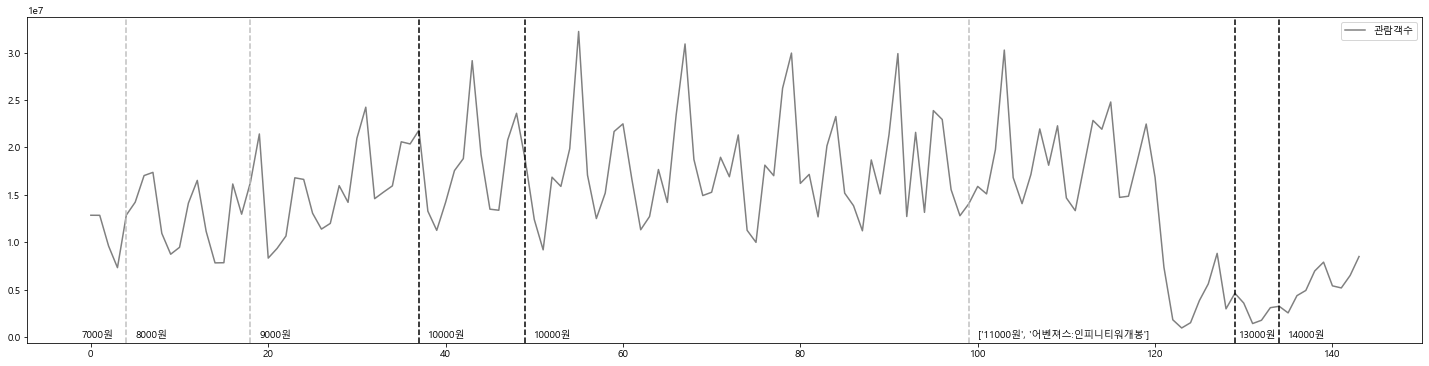

In [74]:
movie_ticket.plot(color = "gray", figsize = (25,6))
plt.axvline(x=4, color = "silver", linestyle = "--")
plt.axvline(x=18, color = "silver", linestyle = "--")
plt.axvline(x=37, color = "black", linestyle = "--")
plt.axvline(x=49, color = "black", linestyle = "--") # 시간대를 더 나눠서 프라임 시간대 가격을 올림
#plt.axvline(x=75, color = "r") >> 가격이 오르지는 않고 가격 체계가 바뀜
plt.axvline(x=99, color = "silver", linestyle = "--")
plt.axvline(x=129, color = "black", linestyle = "--")
plt.axvline(x=134, color = "black", linestyle = "--")

plt.text(-1, 200, "7000원")
plt.text(5, 200, "8000원")
plt.text(19,200, "9000원")
plt.text(38, 200, "10000원")
plt.text(50, 0, "10000원")
plt.text(100,200, ["11000원","어벤져스:인피니티워개봉"])
plt.text(129.5, 200, "13000원")
plt.text(135, 200, "14000원")

가격이 10000원이 넘어간 이후 가격이 오를 때마다 한달간은 관객수가 떨어짐

2018년 4월에는 가격이 떨어짐에도 불구하고 오른 관객수가 증가했는데
    이때는 '어벤져스:인피니티워'가 개봉한 달로 특수 상황이라고 볼 수 있다.

# 결론

 코로나가 발생하면서 코로나가 발생한 2020년은 OTT서비스 이용자가 증가하였고 영화관 이용 관객은 줄어들었었다.하지만 2021년에 접어들면서 사람들은 조금씩 코로나에 익숙해지기 시작했고 코로나에 관계없이 사람들은 영화관을 이용하기 시작하였다. 

 그러한 상황은 그나마 코로나 확진자 수가 비슷한 2020년 12월과 2021년 4월의 관객수 차이와 뉴스 헤드라인의 주요 단어들을 비교함으로 확인할 수 있다. 코로나 확진자 수가 어느정도 비슷하지만(1.4배) 2021년 4월의 영화관이용자 수는 2020년 12월에 비해 거의 2배가 차이난다. 그 때의 뉴스 헤드라인 또한 코로나자체에 집중한 2020년12월에 비해 2021년 4월은 조금 더 활기찬 축제 등에 관심을 갖기 시작했다.

 따라서 영화관 관객 수도 코로나 이전을 극복할 것이고 다른 활동도 많이 이루어질 것이라고 생각된다. 하지만 그렇다고 해서 OTT서비스 이용자가 감소하지는 않는다. 

 그 이유는 OTT서비스를 이용하는 사람들이 언제 어떻게 OTT서비스를 이용하는지에 대해 설문조사한 것으로 확인할 수 있었다. 사람들은 OTT서비스를 주로 1시간 미만으로 하루에 여러 번 이용하는데 TV가 없는 곳에서 이동시간에 주로 이용하기 때문이다. 그렇기 때문에 OTT서비스는 TV와 같은 실시간 방송과 다른 OTT서비스만의 장점이 있기 때문에 이러한 부분을 살리는 것이 OTT서비스 이용의 발전에 도움이 될 것 같다.(적당한 길이의 매체 만들기)

 반면에 OTT서비스 비가입이유로는 해외 자료이긴 하지만 이용요금이 비싸기 때문이 가장 높았다. 사람들이 가격에 민감하다고 생각할 수 있는데, 우리나라도 마찬가지라는 것은 OTT서비스의 가격 상승으로 이용자가 일부 줄었다는 뉴스를 통해서도 알 수 있다. 추가로 영화관 티켓가격의 상승 시점과 영화관 이용 관객수를 살펴보면 10,000원 이상에서는 가격이 오를 때마다 한 달은 영화관 이용 관객수가 줄어드는 것을 확인할 수 있었다. 이를 통해서 사람들이 가격에 민감하다는 것을 알 수 있다. 따라서 OTT서비스에서도 가격 책정시 이 부분을 고려해서 신중하게 이루어져야 한다고 생각된다.

#### 만원 이상에서는 사람들이 많은 부담을 가지므로 가격을 올리는데 신중을 기하고 만원 이상에서 가격을 올릴 때에는 다른 서비스와 합치는 등의 사람들을 유혹할 만한 서비스 제공(TV나 영화보다 확실히 장점이 있는)이나 이벤트가 필요하다고 생각된다. 긴 길이의 영상보다 짧은 길이의 영상을 여러 개 제공하는 것이 더 OTT서비스 이용에 효과적일 것이라고 생각된다.